- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

State your Null Hypothesis and Alternative Hypothesis

Select the correct test according to the data type and number of samples

Test the assumptions of your selected test.

Execute the selected test, or the alternative test (if you do not meet the assumptions)

Interpret your p-value and reject or fail to reject your null hypothesis 

Show a supporting visualization that helps display the result


if p < a 
We reject the Null Hypothesis and support/accept the Alternative Hypothesis.
if p > a
We fail to reject the Null Hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1. Do smokers have higher insurance charges than non-smokers?

Null hypothesis: There is no significant difference in insurance charges between smokers and non-smokers.
Alt hypothesis: There is significant difference in insurance charges between smokers and non-smokers.

a = .05
numeric
2 groups
2 sample T test

In [3]:
# how many of each group
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
# split the groups
smoker = df.loc[df['smoker']=='yes', ['smoker', 'charges']]
nonsmoker = df.loc[df['smoker']=='no', ['smoker', 'charges']]

In [17]:
smoker

,smoker,charges
0,yes,16884.92400
11,yes,27808.72510
14,yes,39611.75770
19,yes,36837.46700
23,yes,37701.87680
...,...,...
1313,yes,36397.57600
1314,yes,18765.87545
1321,yes,28101.33305
1323,yes,43896.37630


In [19]:
# df for plotting
vizDf = pd.concat([smoker, nonsmoker])
vizDf

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


In [28]:
print(len(smoker))
print(len(nonsmoker))

274
1064


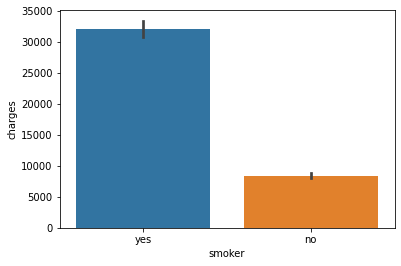

In [20]:
# plot
sns.barplot(data=vizDf, x='smoker', y='charges');

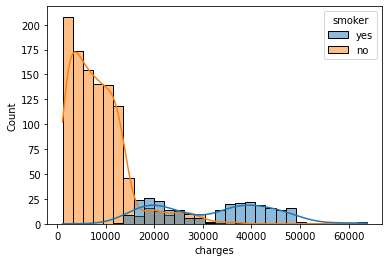

In [22]:
sns.histplot(data=vizDf, x='charges', kde=True, hue='smoker');

In [24]:
# final group variables
smoker = smoker['charges']
nonsmoker = nonsmoker['charges']

In [25]:
# assumptions - check for outliers
zscores = stats.zscore(smoker)
outliers = abs(zscores) > 3
np.sum(outliers)

0

In [26]:
zscores = stats.zscore(nonsmoker)
outliers = abs(zscores) > 3
np.sum(outliers)

24

In [29]:
# remove outliers
nonsmoker = nonsmoker[(np.abs(stats.zscore(nonsmoker))<3)]
nonsmoker

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [30]:
# assumptions - normality
smokerNormality = stats.normaltest(smoker)
smokerNormality

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [31]:
nonsmokerNormality = stats.normaltest(nonsmoker)
nonsmokerNormality

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Both groups' p-values are less than .05 so the data is not normally distributed. However, both groups have sufficient sample sizes to proceed.

In [32]:
# assumptions - equal variance
result = stats.levene(smoker, nonsmoker)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

We do not have equal variance. Must use equal_var=False

In [33]:
# 2 sample t test
result = stats.ttest_ind(smoker, nonsmoker, equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

Since the p value is less than alpha, we reject the null hypothesis. There is a significant difference in charges between smokers and nonsmokers.

## Q2. Are men more likely to smoke than women?

Null hypothesis: There is no significant relationship between the likelihood to smoke and sex.
Alt hypothesis: There is a significant relationship between the likelihood to smoke and sex.
a = .05
categorical
2 groups
chi square

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
# how many of each group
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

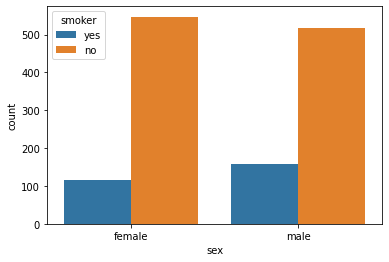

In [37]:
# plot smoking/nonsmoking population by sex
sns.countplot(data=df, x='sex', hue='smoker');

In [38]:
# get contingency table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


assumptions for chi-squared:
outcomes are independent
there are 2 categorical variables

In [39]:
# chi-squared
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result # labeling results

In [40]:
# p-value
print(p)
p<.05

0.006548143503580696


True

Since the p-value is less than .05, we reject the null hypothesis and accept the alternative that there is a significant relationship in the likelihood to smoke and sex.

## Q3. Do different regions have different charges, on average?

Null hypothesis: There is no significant difference in average charges by region.
Alternative hypothesis: There is a significant difference in average charges by region.
a = .05
numerical
> 2 groups
ANOVA

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
# how many of each group
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [50]:
# get avg charge per region
avgChargeDf = df.groupby('region', as_index=False).mean('charges')

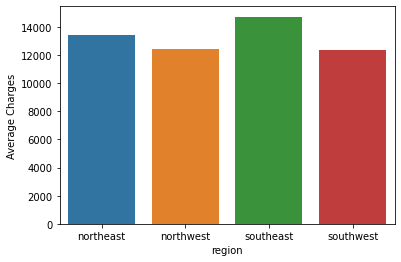

In [57]:
# plot of regions and avg charges
sns.barplot(data=avgChargeDf, x='region', y='charges')
plt.ylabel('Average Charges');

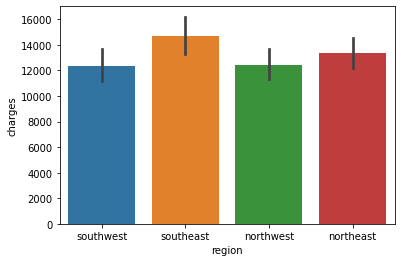

In [54]:
# plot of regions and total charges
sns.barplot(data=df, x='region', y='charges');

In [55]:
# create dict to separate each region
regions = {}
for i in df['region'].unique():
    data = df.loc[df['region']==i, 'charges'].copy()
    regions[i] = data
    
regions.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [56]:
regions['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

In [58]:
# assumptions - normality
# run normality test per group and verify each has at least 20 samples
normResults = {}
for i, data in regions.items():
    stat, p = stats.normaltest(data)
    # save p, test stat, and group size
    normResults[i] = {'n':len(data),
                     'p':p,
                     'test stat': stat}
# convert to df
normResultsDf = pd.DataFrame(normResults).T
normResultsDf

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [59]:
# check sig
normResultsDf['sig'] = normResultsDf['p'] < .05
normResultsDf

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


The groups are not normally distributed but each region has enough samples to proceed.

In [60]:
# assumptions - equal variance
stats.levene(*regions.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

The regions do not have equal variance. Need to use Kruskal-Wallis.

In [61]:
# run kruskal test
stats.kruskal(*regions.values())

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

p > .05 so we fail to reject the null hypothesis that there is no significant difference in avg charges by region.